In [1]:
import json
import pickle
import urllib
import numpy as np
import torch
#import torch_geometric_temporal
#from torch_geometric_temporal.signal import StaticGraphTemporalSignal
#from sklearn.preprocessing import StandardScaler
import time

#torch.set_default_device('cuda:0')

In [2]:
import torch.nn.functional as F
from matplotlib import pyplot as plt
#from torch_geometric_temporal.nn.recurrent import DCRNN
#from torch_geometric_temporal.signal import temporal_signal_split

#train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r"../data/prices.csv")

columns = [data.iloc[:, i].to_numpy() for i in range(1,len(data.columns))]
series = list(map(list, zip(*columns)))

# Normalization of the data
scaler = StandardScaler()
series = scaler.fit_transform(series)

len(series)
#series[0]

8030

In [70]:
mu = scaler.mean_
sigma = scaler.scale_
sigma

array([ 33.81230562,  29.92566225,  23.95642845,  23.08344885,
        24.99149734,  30.37790109,  64.62803107,  75.02307404,
        86.47102203,  99.48511891, 119.52592161, 135.64488764,
       134.60637697, 142.45167965, 145.43296655, 147.49190841,
       161.93358766, 181.04869188, 142.53849513, 122.44785276,
       105.25500325,  93.67965756,  52.06614424,  47.67590622])

In [71]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lags = 3
X, y = create_sequences(series, lags)
#X[1]

In [72]:
# lags = 3
# dataset = [list(series[i]) + list(series[i+1]) for i in range(0, len(series)-2)]
# for j in range(2, lags):
#     dataset = [dataset[i] + list(series[i+j]) for i in range(0, len(series)-j-1)]
#     #print(j)
# len(dataset)

In [35]:
# max_hourly = np.max(np.array(series), axis=0)/20
# max_hourly

In [73]:
lag_gnn = 90
train_size = int(0.8 * (len(X)-lag_gnn+1))
train_size

6350

In [74]:
train_stop = train_size+lag_gnn-1
train_stop

6439

In [75]:
test_size = len(X)-train_size-lag_gnn+1
test_size

1588

In [76]:
X_train = X[lag_gnn-1:train_stop]
X_test = X[train_stop:]
X_train[0]*sigma+mu

array([[24.   , 24.   , 24.   , 24.   , 24.   , 24.   , 24.11 , 37.35 ,
        40.68 , 40.9  , 41.49 , 41.49 , 42.06 , 42.36 , 42.36 , 42.36 ,
        41.76 , 41.49 , 40.9  , 41.47 , 41.5  , 41.51 , 39.57 , 33.32 ],
       [24.   , 24.   , 24.   , 24.   , 24.   , 24.   , 24.   , 33.89 ,
        44.36 , 47.19 , 54.75 , 64.89 , 63.55 , 46.94 , 44.66 , 44.66 ,
        44.66 , 44.66 , 44.63 , 44.62 , 44.57 , 43.98 , 43.88 , 30.52 ],
       [24.01 , 24.005, 24.   , 24.   , 24.   , 24.   , 24.   , 24.   ,
        24.   , 30.43 , 43.35 , 43.65 , 44.28 , 44.08 , 43.2  , 43.   ,
        43.   , 43.   , 42.96 , 40.77 , 42.57 , 44.39 , 40.72 , 24.69 ]])

In [77]:
y_train = y[lag_gnn-1:train_stop]
y_test = y[train_stop:]
len(y_test)

1588

In [78]:
class RNN_vanilla(torch.nn.Module):
    def __init__(self, node_features, hidden_size):
        super(RNN_vanilla, self).__init__()
        self.h_0 = torch.zeros(1, hidden_size)
        self.rec = torch.nn.RNN(node_features*24, hidden_size)
        #self.linear2 = torch.nn.Linear(50, 50)
        #self.lin = torch.nn.Linear(hidden_size, 24)
        #self.dropout1 = torch.nn.Dropout(0.3)
        #self.dropout2 = torch.nn.Dropout(0.15)

    def forward(self, x):
        h,_ = self.rec(x,self.h_0)
        #h = F.relu(h)
        #h = self.linear2(h)
        #h = self.dropout2(h)
        #h = self.lin(h)
        #h = self.dropout1(h)
        return h

In [47]:
for name, p in model.named_parameters():
    print(name)
    print(p.numel())
print('-------')
tot = sum(p.numel() for p in model.parameters())
print('total parameters = '+str(tot))

rec.weight_ih_l0
6912
rec.weight_hh_l0
2304
rec.bias_ih_l0
96
rec.bias_hh_l0
96
-------
total parameters = 9408


In [71]:
24*72

1728

  Epoch 1/100
Training loss:  1.3028269
  Epoch 2/100
Training loss:  1.122653
  Epoch 3/100
Training loss:  1.0127627
  Epoch 4/100
Training loss:  0.9710061
  Epoch 5/100
Training loss:  0.9468112
  Epoch 6/100
Training loss:  0.93573236
  Epoch 7/100
Training loss:  0.9280966
  Epoch 8/100
Training loss:  0.9149418
  Epoch 9/100
Training loss:  0.9012382
  Epoch 10/100
Training loss:  0.88847965
  Epoch 11/100
Training loss:  0.8763059
  Epoch 12/100
Training loss:  0.8674317
  Epoch 13/100
Training loss:  0.85895044
  Epoch 14/100
Training loss:  0.849921
  Epoch 15/100
Training loss:  0.842829
  Epoch 16/100
Training loss:  0.8376932
  Epoch 17/100
Training loss:  0.8328091
  Epoch 18/100
Training loss:  0.8281916
  Epoch 19/100
Training loss:  0.82454956
  Epoch 20/100
Training loss:  0.820605
  Epoch 21/100
Training loss:  0.8154818
  Epoch 22/100
Training loss:  0.81028
  Epoch 23/100
Training loss:  0.8058441
  Epoch 24/100
Training loss:  0.8018439
  Epoch 25/100
Training los

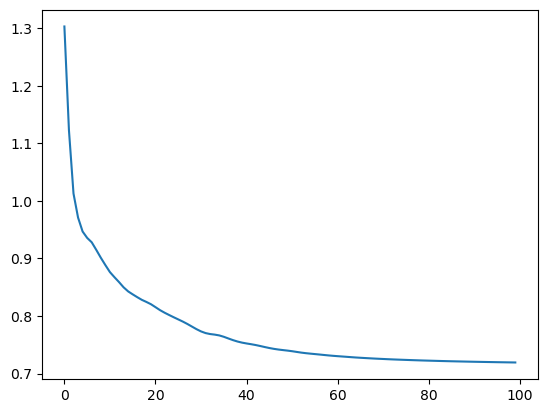

In [79]:
model = RNN_vanilla(node_features = lags, hidden_size=24)
#model = model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=0.015)
loss_fn = torch.nn.MSELoss()

start_time = time.perf_counter() # Start timer
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    model.train()
    print("  Epoch %d/%d" % (epoch+1,num_epochs))
    X_feature = torch.tensor(X_train, dtype=torch.float32).view(train_size,len(series[0])*lags)
    #snapshot.to('cuda')
    output = model(X_feature)
    y_label = torch.tensor(y_train, dtype=torch.float32)
    loss = loss_fn(output, y_label)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.cpu().detach().numpy())
    
    print('Training loss: ', losses[-1])

end_time = time.perf_counter() # End timer
print("Elapsed time: ", end_time - start_time) # Calculate elapsed time
output = scaler.inverse_transform(output.cpu().detach().numpy())

plt.plot(losses)


In [27]:
# for param in model.named_parameters():
#     print(param)

In [38]:
from torch.nn import GRU, LSTM

In [62]:
class RNN_vanilla(torch.nn.Module):
    def __init__(self, node_features, hidden_size):
        super(RNN_vanilla, self).__init__()
        self.h_0 = torch.zeros(1, hidden_size)
        self.rec = torch.nn.GRU(node_features*24, hidden_size)
        #self.linear2 = torch.nn.Linear(50, 50)
        #self.lin = torch.nn.Linear(hidden_size, 24)
        #self.dropout1 = torch.nn.Dropout(0.3)
        #self.dropout2 = torch.nn.Dropout(0.15)

    def forward(self, x):
        h,_ = self.rec(x,self.h_0)
        #h = F.relu(h)
        #h = self.linear2(h)
        #h = self.dropout2(h)
        #h = self.lin(h)
        #h = self.dropout1(h)
        return h

In [45]:
class RNN_vanilla(torch.nn.Module):
    def __init__(self, node_features, hidden_size):
        super(RNN_vanilla, self).__init__()
        self.h_0 = torch.zeros(1, hidden_size)
        self.c_0 = torch.zeros(1, hidden_size)
        self.rec = torch.nn.LSTM(node_features*24, hidden_size)
        #self.linear2 = torch.nn.Linear(50, 50)
        #self.lin = torch.nn.Linear(hidden_size, 24)
        #self.dropout1 = torch.nn.Dropout(0.3)
        #self.dropout2 = torch.nn.Dropout(0.15)

    def forward(self, x):
        h,(_,_) = self.rec(x,(self.h_0, self.c_0))
        #h = F.relu(h)
        #h = self.linear2(h)
        #h = self.dropout2(h)
        #h = self.lin(h)
        #h = self.dropout1(h)
        return h

In [80]:
model.eval()

X_feature = torch.tensor(X_test, dtype=torch.float32).view(test_size, len(series[0])*lags)
output_test = model(X_feature)
y_label = torch.tensor(y_test, dtype=torch.float32)
loss = loss_fn(output_test, y_label)
outputs_test = scaler.inverse_transform(output_test.cpu().detach().numpy())
loss.item()

0.767587423324585

In [81]:
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
y_train

array([[24.  , 24.  , 24.01, ..., 44.4 , 44.12, 39.42],
       [24.  , 24.  , 24.  , ..., 48.07, 42.76, 30.09],
       [23.99, 24.  ,  6.44, ..., 44.63, 41.23, 35.7 ],
       ...,
       [18.4 , 18.39, 18.35, ..., 18.45, 17.42, 15.37],
       [14.05, 14.18, 14.89, ..., 17.37, 15.39, 15.31],
       [15.38, 15.4 , 16.14, ..., 22.98, 20.91, 18.87]])

In [82]:
outputs_hourly = []
y_label_hourly = []
outputs_test_hourly = []
y_label_test_hourly = []
for j in range(24):
    outputs_h = [output[i][j] for i in range(len(output))]
    outputs_hourly.append(outputs_h)
    y_label_h = [y_train[i][j] for i in range(len(output))]
    y_label_hourly.append(y_label_h)
    outputs_test_h = [outputs_test[i][j] for i in range(len(outputs_test))]
    outputs_test_hourly.append(outputs_test_h)
    y_label_test_h = [y_test[i][j] for i in range(len(outputs_test))]
    y_label_test_hourly.append(y_label_test_h)

In [18]:
# for day in y_train:
#     day*max_hourly

# for day in y_test:
#     day*max_hourly

In [83]:
mse_train = []
mae_train = []
residuals_train = []
mse_test = []
mae_test = []
residuals_test = []
for j in range(24):
    diff = [a - b for a,b in zip(y_label_hourly[j],outputs_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(y_label_hourly[j],outputs_hourly[j])]
    diffabs = [abs(a - b) for a,b in zip(y_label_hourly[j],outputs_hourly[j])]
    mae_train.append(np.mean(diffabs))
    mse_train.append(np.mean(squared_diff))
    residuals_train.append(diff)
    diffabs = [abs(a - b) for a,b in zip(y_label_test_hourly[j],outputs_test_hourly[j])]
    diff = [a - b for a,b in zip(y_label_test_hourly[j],outputs_test_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(y_label_test_hourly[j],outputs_test_hourly[j])]
    mae_test.append(np.mean(diffabs))
    mse_test.append(np.mean(squared_diff))
    residuals_test.append(diff)

mse_train

[714.7784059823231,
 590.6766127053049,
 355.2858813795072,
 286.8958449180204,
 353.6457360918893,
 496.1898676788864,
 3141.2129001601047,
 3949.0654995921227,
 5523.922725076853,
 7375.707530085409,
 10774.206222671908,
 14372.908175066525,
 14579.585574483393,
 16055.718799851316,
 16688.17070691072,
 16944.691062912574,
 19440.34768113742,
 23834.375906122415,
 14848.95547132447,
 11124.538124012337,
 8604.653627780683,
 7348.064039852572,
 2047.3105442340297,
 1756.7195391325065]

In [56]:
len(diff)

1588

In [57]:
len(y_label_hourly[0])

6350

In [69]:
np.mean(mae_test)

32.715250644650105

In [46]:
mse_test

[917.9918195957465,
 467.48590825631806,
 244.25446495958963,
 434.71446048664495,
 554.3819956484531,
 1179.6802871250256,
 3929.841074224154,
 5986.6897513111,
 6856.8803540647605,
 9202.757570459617,
 12012.55871340047,
 12758.27800457259,
 11502.124430619506,
 15197.455284914085,
 14906.405206020088,
 15737.723363284284,
 21561.96804365467,
 24686.03495323261,
 17154.93799655313,
 12682.111414163854,
 8065.39566214703,
 3894.849038809598,
 2010.880424922911,
 1696.275337494102]

In [47]:
np.mean(mse_test)

8485.069814996681

In [23]:
np.array(mse_train).shape

(24,)

In [25]:
mse_train = np.array(mse_train)
mse_test = np.array(mse_test)
mse_train
#np.mean(mse_train)

array([  563.26026585,   467.74384322,   256.59147744,   202.82474272,
         254.20997714,   377.63535935,  2606.00399486,  2728.98432781,
        3716.04554606,  5128.56353344,  7055.9674538 ,  8833.73278666,
        8752.77013896, 10032.7345054 , 10623.79898333, 10580.98039345,
       12840.79844591, 17110.93389201, 11016.43771217,  8384.67352889,
        6406.25610292,  5722.76276911,  1579.51191747,  1614.80004979])

In [64]:
np.mean(mse_test/(sigma**2))

0.7885433014950984

In [65]:
np.mean(mse_train/(sigma**2))

0.6843557884470091

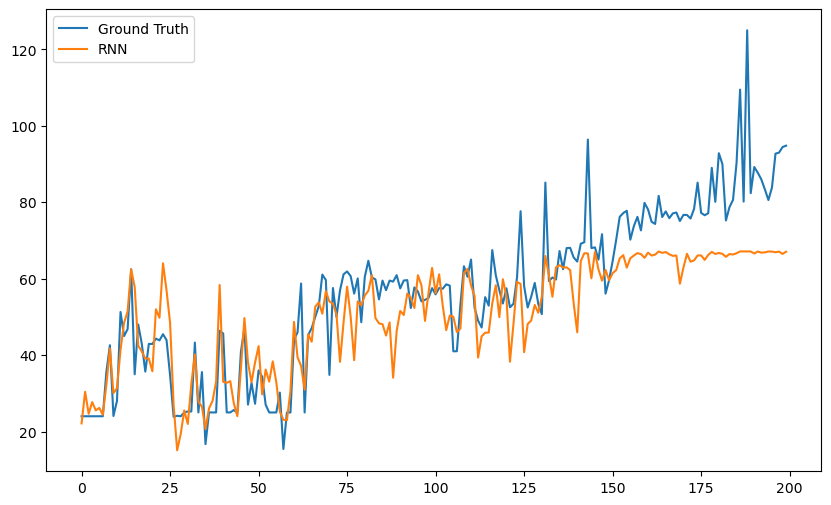

In [70]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_label_hourly[0][:200],label='Ground Truth')
plt.plot(outputs_hourly[0][:200],label='RNN')
#plt.plot(outputs_test)
plt.legend()
plt.show()

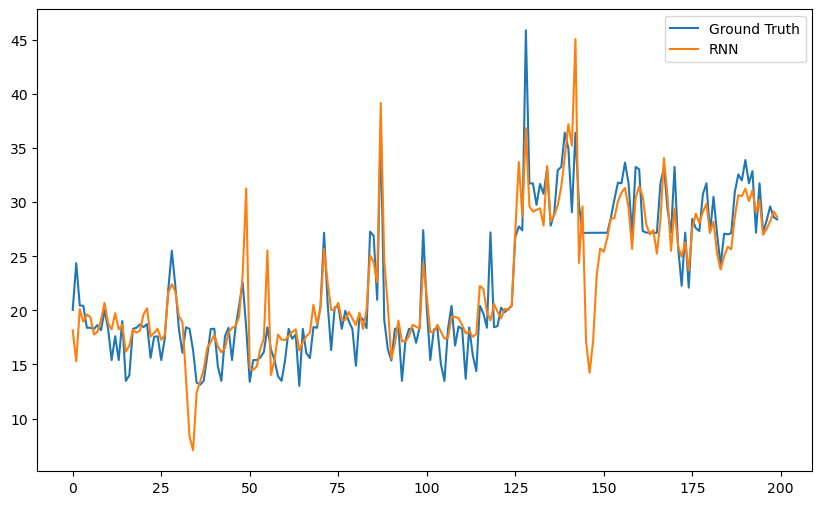

In [71]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_label_test_hourly[0][:200],label='Ground Truth')
plt.plot(outputs_test_hourly[0][:200],label='RNN')
#plt.plot(outputs_test)
plt.legend()
plt.show()

In [84]:
# rnn_bla_y = y_label_test_hourly
# rnn_bla_o = outputs_test_hourly
# rnn_res = residuals_test
# mse_train_rnn = mse_train
# mse_test_rnn = mse_test
# mae_train_rnn = mae_train
# mae_test_rnn = mae_test

In [68]:
# gru_bla_y = y_label_test_hourly
# gru_bla_o = outputs_test_hourly
# gru_res = residuals_test
# mse_train_gru = mse_train
# mse_test_gru = mse_test
# mae_train_gru = mae_train
# mae_test_gru = mae_test

In [52]:
# lstm_bla_y = y_label_test_hourly
# lstm_bla_o = outputs_test_hourly
# lstm_res = residuals_test
# mse_train_lstm = mse_train
# mse_test_lstm = mse_test
# mae_train_lstm = mae_train
# mae_test_lstm = mae_test

In [88]:
np.mean(mse_train_rnn)

8383.65110329847

In [89]:
np.mean(mse_test_rnn)

8321.38405310746

In [90]:
np.mean(mae_test_rnn)

32.387507721818814

In [91]:
np.mean(mae_train_rnn)

35.319979200503035

In [92]:
np.mean(mse_train_gru)

8228.641257839268

In [93]:
np.mean(mse_test_gru)

8547.638175147104

In [94]:
np.mean(mae_train_gru)

34.75912009568922

In [95]:
np.mean(mae_test_gru)

32.95569908237667

In [96]:
np.mean(mse_train_lstm)

8192.210044833613

In [97]:
np.mean(mse_test_lstm)

8569.17889103201

In [98]:
np.mean(mae_train_lstm)

36.32923732546724

In [99]:
np.mean(mae_test_lstm)

32.751335721533245

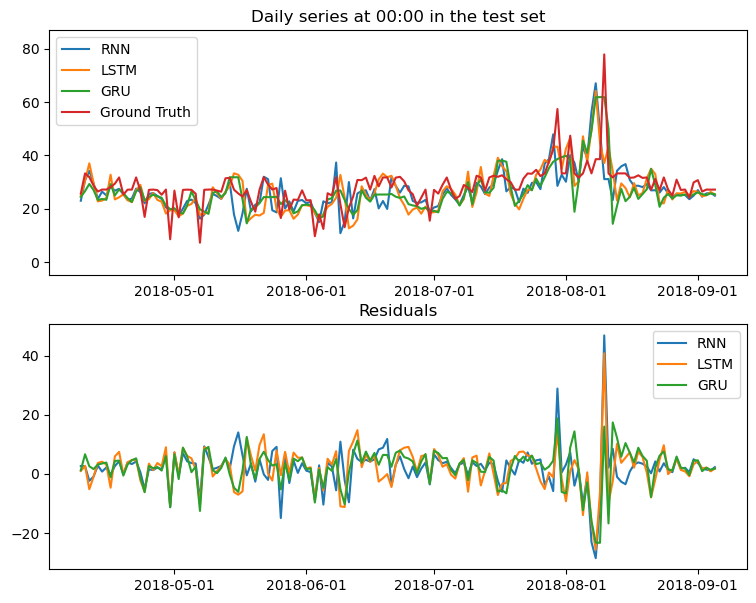

In [86]:
tick_positions = [22, 53, 83, 114, 145]  # Posizioni specifiche dei tick
tick_labels = ["2018-05-01", "2018-06-01", "2018-07-01", "2018-08-01", "2018-09-01"]  # Etichette come date

fig, axs = plt.subplots(2, 1, figsize=(9, 7))

axs[0].plot(rnn_bla_o[0][227:377],label='RNN')
axs[0].plot(lstm_bla_o[0][227:377],label='LSTM')
axs[0].plot(gru_bla_o[0][227:377],label='GRU')
axs[0].plot(rnn_bla_y[0][227:377],label='Ground Truth')
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(tick_labels)
axs[0].legend()
axs[0].set_title("Daily series at 00:00 in the test set")
#axs[0].set_ylim([-5, 87])
axs[1].plot(rnn_res[0][227:377], label="RNN")
axs[1].plot(lstm_res[0][227:377], label="LSTM")
axs[1].plot(gru_res[0][227:377], label="GRU")
axs[1].legend()
axs[1].set_title("Residuals")
axs[1].set_xticks(tick_positions)
axs[1].set_xticklabels(tick_labels)
plt.show()

In [44]:
#NAIVE(non rirunnare)
series = scaler.inverse_transform(series)

In [45]:
y_train_naive = series[1:train_size+1]
y_test_naive = series[train_size+1:]
len(y_train_naive)

6421

In [46]:
len(y_test_naive)
y_train_naive[0]

array([ 11.67,   5.9 ,   5.9 ,   5.85,   5.85,   5.85,   5.9 ,  17.03,
        20.46,  21.04,  22.11,  30.41,  30.41,  30.44,  32.19,  31.09,
        40.19, 388.07,  65.12,  58.1 ,  51.14,  51.13,  35.09,  30.51])

In [47]:
#check
np.max(y_test_naive, axis=0)

array([999.99, 742.59, 442.57, 664.92, 656.35, 824.01, 926.64, 998.75,
       999.65, 999.99, 999.99, 997.02, 976.  , 965.32, 999.54, 999.99,
       999.99, 999.99, 999.99, 999.99, 999.99, 999.99, 999.99, 999.99])

In [48]:
naive_series = series[:-1,:]
len(naive_series)
#len(series)
naive_series#[:,0]

array([[ 21.65,  21.  ,   5.9 , ...,  27.31,  21.5 ,  15.13],
       [ 11.67,   5.9 ,   5.9 , ...,  51.13,  35.09,  30.51],
       [ 25.54,  21.  ,  21.  , ...,  33.18,  30.87,  21.63],
       ...,
       [999.99, 742.59, 228.81, ...,  45.69,  38.09,  41.92],
       [ 44.46,  60.62,  63.58, ...,  45.07,  42.02,  46.06],
       [ 42.16,  37.5 ,  35.1 , ...,  84.94,  74.68,  74.62]])

In [49]:
naive_train = naive_series[:train_size]
naive_test = naive_series[train_size:]
len(naive_test)
naive_train[0]

array([21.65, 21.  ,  5.9 ,  5.85,  5.84,  5.9 ,  5.9 ,  6.52, 20.99,
       20.99, 21.6 , 21.5 , 21.51, 21.59, 21.5 , 21.75, 27.02, 28.57,
       27.48, 27.48, 24.23, 27.31, 21.5 , 15.13])

In [50]:
outputs_hourly = []
y_label_hourly = []
outputs_test_hourly = []
y_label_test_hourly = []
for j in range(24):
    outputs_hourly.append(list(naive_train[:,j]))
    y_label_h = [y_train_naive[i][j] for i in range(len(naive_train))]
    y_label_hourly.append(y_label_h)
    outputs_test_hourly.append(list(naive_test[:,j]))
    y_label_test_h = [y_test_naive[i][j] for i in range(len(naive_test)-2)]
    y_label_test_hourly.append(y_label_test_h)

In [67]:
#y_label_hourly[0]

In [52]:
mse_train_naive = []
residuals_train = []
mse_test_naive = []
residuals_test = []
for j in range(24):
    diff = [a - b for a,b in zip(y_label_hourly[j],outputs_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(y_label_hourly[j],outputs_hourly[j])]
    mse_train_naive.append(np.mean(squared_diff))
    residuals_train.append(diff)
    diff = [a - b for a,b in zip(y_label_test_hourly[j],outputs_test_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(y_label_test_hourly[j],outputs_test_hourly[j])]
    mse_test_naive.append(np.mean(squared_diff))
    residuals_test.append(diff)

mse_train_naive

[1361.741675408815,
 1062.311342763121,
 568.2495389658931,
 391.97803778227694,
 502.9293275969475,
 785.834531365831,
 5502.635014530447,
 5865.345977558014,
 8694.09224183149,
 12799.08633767326,
 17277.49114142657,
 20582.97998674661,
 19938.211523859212,
 21677.77715872917,
 22067.998098364744,
 21430.382158511136,
 25582.877138545395,
 31501.311480330165,
 20373.257729792866,
 16238.606036769972,
 11868.747937377355,
 10244.645359040647,
 2606.553845693817,
 2762.570913658308]

mse dai benchmark

In [70]:
mse_var = pd.read_csv('data/mse_var.csv')
mse_var['mse_train_ffn'] = mse_train
mse_var['mse_test_ffn'] = mse_test
#mse_var['mse_train_naive'] = mse_train_naive
#mse_var['mse_test_test_naive'] = mse_test_naive 
mse_var = mse_var.round(1).applymap(lambda x: f'{x:.1f}'.rstrip('0').rstrip('.'))
mse_var

,mse_train,mse_test,mae_test,mse_train_ffn,mse_test_ffn
0,576.3,549.4,7.6,527.7,625.2
1,492.9,283.1,6.8,453.9,322.8
2,279,197.6,6.6,242.4,215.4
3,218.5,307.2,6.8,196.3,369.6
4,279.5,440.6,7.4,238.1,496.5
5,407.1,1101.5,9,358.4,1147.6
6,2688.1,3439.4,19.4,2504.3,3492.4
7,3051.5,4960.1,25.4,2621,5278.2
8,4289.9,5835.6,28.7,3732.3,7053.2
9,5862.8,8075.2,34.1,5172.1,10676.8


In [54]:
print(mse_var.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
mse_train & mse_test & mse_train_ffn & mse_test_ffn & mse_train_naive & mse_test_ffn_naive \\
\midrule
575.7 & 549.4 & 530.1 & 825.4 & 1361.7 & 1509.6 \\
621.7 & 600 & 454.8 & 449.9 & 1062.3 & 590.8 \\
672.7 & 732.6 & 252.9 & 225.1 & 568.2 & 299.6 \\
719.5 & 772 & 199.3 & 410.3 & 392 & 668.9 \\
706.2 & 774.1 & 245.9 & 538.9 & 502.9 & 845 \\
668.7 & 717.3 & 367.8 & 1134 & 785.8 & 2005.6 \\
1264.4 & 1020.2 & 2516.3 & 3578 & 5502.6 & 5958.2 \\
2129.2 & 1515.8 & 2660.6 & 5707.8 & 5865.3 & 7907.1 \\
3034.3 & 1988 & 3675.4 & 6951.5 & 8694.1 & 9477.4 \\
4122.8 & 2359.4 & 5280.8 & 9505.7 & 12799.1 & 12482.7 \\
6638.1 & 3784.8 & 7247.3 & 12939.8 & 17277.5 & 17692.9 \\
9387.4 & 4897 & 8832.3 & 15554.2 & 20583 & 19389.5 \\
9165.5 & 4765.5 & 8899.7 & 13639.1 & 19938.2 & 16808.4 \\
10029.6 & 5166.5 & 10038.3 & 17224.2 & 21677.8 & 22884.7 \\
10404.9 & 5536.1 & 10405.3 & 16996 & 22068 & 19333.9 \\
10793 & 5821.5 & 10309.2 & 18460.9 & 21430.4 & 20696.7 \\
13224.3 & 845